CV ROC AUC (5-fold): [0.9950868  0.98558795 0.98511905 0.99702381 0.99899396] mean: 0.992362313415376

--- Evaluation Metrics ---
Accuracy: 0.9649122807017544
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1 Score: 0.9722222222222222
ROC-AUC: 0.996031746031746

Confusion Matrix:
 [[40  2]
 [ 2 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        42
           1       0.97      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



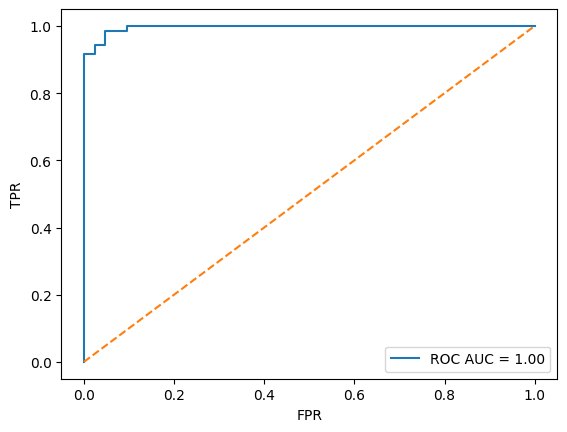

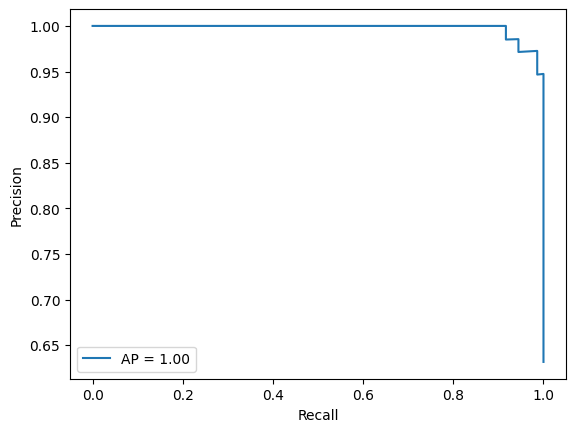

In [6]:
# Day7_evaluation_cv.py
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, average_precision_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score
)
import matplotlib.pyplot as plt
import numpy as np

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

clf = LogisticRegression(max_iter=10000, solver='liblinear')

# Stratified K-Fold CV with ROC-AUC
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(clf, X, y, cv=skf, scoring='roc_auc')
print("CV ROC AUC (5-fold):", scores, "mean:", scores.mean())

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
clf.fit(X_train, y_train)

# Predictions
y_proba = clf.predict_proba(X_test)[:,1]   # probabilities
y_pred = clf.predict(X_test)               # hard labels

# ---------- METRICS ----------
print("\n--- Evaluation Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))  # needs proba

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------- ROC Curve ----------
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.legend(); plt.show()

# ---------- Precision-Recall Curve ----------
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)
plt.plot(recall, precision, label=f'AP = {ap:.2f}')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.legend(); plt.show()
